In [1]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pattern
from pattern.en import lemma

from gensim.models import Word2Vec

import numpy as np
import re

from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [2]:
review_df = pd.read_csv('Review_Data.csv')
stop_words = set(stopwords.words('english'))

In [3]:
review_df.head()

,asin,title,review,star
0,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Poor call quality ...,\n\n\n\n\n\n\n\n\n\n \n \n \n Got these ...,3.0
1,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Sound Output\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n Music qual...,5.0
2,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Wonderful\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n I was a bi...,5.0
3,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Hi\n \n,\n\n\n\n\n\n\n\n\n\n \n \n \n Hi\n\n \n,4.0
4,B0855T8JT2,\n\n\n\n\n\n\n\n \n \n Best earbuds for 5...,\n\n\n\n\n\n\n\n\n\n \n \n \n The produc...,5.0


In [4]:
cols = ['title', 'review']
review_df['combined'] = review_df[cols].apply(lambda row: '\n'.join(row.values.astype(str)), axis=1)
review_df.drop(['title','review'],axis = 1,inplace = True)
review_df.head()

,asin,star,combined
0,B0855T8JT2,3.0,\n\n\n\n\n\n\n\n \n \n Poor call quality ...
1,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Sound Output\n \n...
2,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Wonderful\n \n\n\...
3,B0855T8JT2,4.0,\n\n\n\n\n\n\n\n \n \n Hi\n \n\n\n\n\n\n...
4,B0855T8JT2,5.0,\n\n\n\n\n\n\n\n \n \n Best earbuds for 5...


In [5]:
def clean_data(stri):
    sent_lst = []

    for sent in sent_tokenize(stri):
        lst = []
        for word in word_tokenize(sent):
            if(word.isalpha() and not word in stop_words and len(word)>1):
                lst.append(word.lower())
        #clean_sent = ' '.join(lst)
        #sent_lst.append(clean_sent)
        sent_lst = sent_lst+lst

    para = '. '.join(sent_lst)
    return sent_lst

In [6]:
review_df['combined'] = review_df['combined'].apply(lambda x: clean_data(x))

In [7]:
review_df.head()

,asin,star,combined
0,B0855T8JT2,3.0,"[poor, call, quality, return, got, earphones, ..."
1,B0855T8JT2,5.0,"[sound, output, music, quality, way, better, c..."
2,B0855T8JT2,5.0,"[wonderful, bit, skeptical, buying, performing..."
3,B0855T8JT2,4.0,"[hi, hi]"
4,B0855T8JT2,5.0,"[best, earbuds, rs, the, product, feels, premi..."


In [8]:
review_df['star'].value_counts()

5.0    1082
1.0     706
4.0     444
3.0     289
2.0     234
Name: star, dtype: int64

In [9]:
def update_star(star):
    if star == 5:
        return 1
    elif star in [3,4]:
        return 0
    else:
        return -1

review_df['star'] = review_df['star'].apply(lambda x: update_star(x))

review_df['star'].value_counts()

 1    1082
-1     940
 0     733
Name: star, dtype: int64

In [10]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(review_df['combined'].values, min_count = 1,size = 500, window = 5)

In [11]:
w2v_model.wv.most_similar('good')

[('sound', 0.9993500709533691),
 ('bass', 0.9966362714767456),
 ('build', 0.9938165545463562),
 ('quality', 0.9937824010848999),
 ('awesome', 0.9929171800613403),
 ('cancellation', 0.9891846776008606),
 ('great', 0.984470546245575),
 ('amazing', 0.9811574816703796),
 ('harmless', 0.9806011319160461),
 ('noise', 0.98052978515625)]

In [12]:
w2v_model['great']

<ipython-input-12-dbf8b147b8c6>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  w2v_model['great']


array([-0.09333984, -0.14042993,  0.04643009,  0.06607221,  0.11201394,
        0.3535476 , -0.21266334, -0.3948835 , -0.07899553,  0.16217926,
       -0.10901558,  0.07805146, -0.22244385,  0.16926046,  0.29651567,
        0.4069054 , -0.24546531, -0.00213775,  0.19387573, -0.11414941,
       -0.28538722, -0.07564654, -0.11815751,  0.05870759,  0.16874236,
       -0.31764162,  0.09244335, -0.51054907,  0.03271062,  0.2852259 ,
       -0.5907418 , -0.02782367, -0.21475072, -0.01912696,  0.00115082,
        0.22162618,  0.28749958, -0.05500311,  0.25548744, -0.00970612,
        0.24128166, -0.14706999,  0.0699497 , -0.1316559 , -0.02467013,
        0.09104526, -0.2845481 ,  0.1250276 ,  0.34114864,  0.20195752,
        0.07160643, -0.05632507, -0.10370009, -0.09468248, -0.14004974,
       -0.11093871, -0.12500443,  0.21647789, -0.10736471, -0.15351032,
        0.00948211,  0.4266645 , -0.3406965 ,  0.04381622, -0.08873503,
        0.19306546,  0.49964055, -0.18358082, -0.07975745, -0.05

In [13]:
X = []
for i in review_df['combined']:
    lst = []
    n = len(i)
    for j in i:
        lst.append(w2v_model[j])
    lst = np.array(lst)
    X.append([np.sum(lst[:,i])/n for i in range(100)])

<ipython-input-13-c94bacd36426>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  lst.append(w2v_model[j])


In [14]:
X = np.array(X)

In [15]:
review_df['star'].value_counts()

 1    1082
-1     940
 0     733
Name: star, dtype: int64

In [16]:
review_df.shape

(2755, 3)

In [17]:
np.shape(X)

(2755, 100)

In [18]:
y = review_df['star'].ravel()

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=17)

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np

def cross_val(model,X,y):
       
    f1_scr = []
    
    rfk = KFold(n_splits=3, random_state=None,shuffle = True)
    
    for train, test in rfk.split(X): ## you must do this on full dataset 
        print
        try:
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            
        except:
            X_train = X[train,:]
            X_test = X[test,:]
                        
        y_train = y[train]
        y_test = y[test]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred,average = 'micro')
        f1_scr.append(f1)
    print('F1 Score',np.mean(f1_scr))
                    
    return model

In [20]:
from sklearn import metrics

def pred(model,X,y):
    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred,average = 'micro')
    print(f1)
    print(metrics.confusion_matrix(y, y_pred))
    print(metrics.classification_report(y, y_pred))

In [21]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs',max_iter = 200)

Log_Reg = cross_val(Log_Reg,X_train,y_train)
pred(Log_Reg,X_valid,y_valid)

F1 Score 0.544066704456815
0.5477629987908101
[[210   6  65]
 [ 93   9 105]
 [ 95  10 234]]
              precision    recall  f1-score   support

          -1       0.53      0.75      0.62       281
           0       0.36      0.04      0.08       207
           1       0.58      0.69      0.63       339

    accuracy                           0.55       827
   macro avg       0.49      0.49      0.44       827
weighted avg       0.51      0.55      0.49       827



In [22]:
from sklearn.tree import DecisionTreeClassifier

DCT_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

DCT_Classifier = cross_val(DCT_Classifier,X_train,y_train)
pred(DCT_Classifier,X_valid,y_valid)

F1 Score 0.5705529150900585
0.585247883917775
[[189  50  42]
 [ 59  93  55]
 [ 63  74 202]]
              precision    recall  f1-score   support

          -1       0.61      0.67      0.64       281
           0       0.43      0.45      0.44       207
           1       0.68      0.60      0.63       339

    accuracy                           0.59       827
   macro avg       0.57      0.57      0.57       827
weighted avg       0.59      0.59      0.59       827



In [23]:
from sklearn.ensemble import RandomForestClassifier

RF_Classifier = cross_val(RandomForestClassifier(),X_train,y_train)
pred(RF_Classifier,X_valid,y_valid)

F1 Score 0.6296767327348278
0.6505441354292624
[[190  54  37]
 [ 46  96  65]
 [ 37  50 252]]
              precision    recall  f1-score   support

          -1       0.70      0.68      0.69       281
           0       0.48      0.46      0.47       207
           1       0.71      0.74      0.73       339

    accuracy                           0.65       827
   macro avg       0.63      0.63      0.63       827
weighted avg       0.65      0.65      0.65       827



In [24]:
from xgboost import XGBClassifier

XGB_Classifier = cross_val(XGBClassifier(),X_train,y_train)
pred(XGB_Classifier,X_valid,y_valid)

F1 Score 0.6307062720341597
0.6469165659008465
[[191  54  36]
 [ 50  91  66]
 [ 39  47 253]]
              precision    recall  f1-score   support

          -1       0.68      0.68      0.68       281
           0       0.47      0.44      0.46       207
           1       0.71      0.75      0.73       339

    accuracy                           0.65       827
   macro avg       0.62      0.62      0.62       827
weighted avg       0.64      0.65      0.64       827



In [25]:
from sklearn.svm import SVC

SVM_Classifier = cross_val(SVC(),X_train,y_train)
pred(SVM_Classifier,X_valid,y_valid)

F1 Score 0.545120468210249
0.562273276904474
[[195   0  86]
 [ 76   0 131]
 [ 69   0 270]]
              precision    recall  f1-score   support

          -1       0.57      0.69      0.63       281
           0       0.00      0.00      0.00       207
           1       0.55      0.80      0.65       339

    accuracy                           0.56       827
   macro avg       0.38      0.50      0.43       827
weighted avg       0.42      0.56      0.48       827



C:\Users\sanja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 :  0.41832675024432836
3 :  0.3452251699647436
4 :  0.30757917330519285
5 :  0.3072953497507917
6 :  0.29733309209454184
7 :  0.28241712541358543
8 :  0.27958392902963164
9 :  0.27026302351359327
10 :  0.27105285889199915
11 :  0.26860235068013755
12 :  0.2684643881299456
13 :  0.27079188453265923
14 :  0.26438267826533335
15 :  0.26267779883902137
16 :  0.26357354084698387
17 :  0.2576913177083489
18 :  0.25982921763312045
19 :  0.24998778573197464


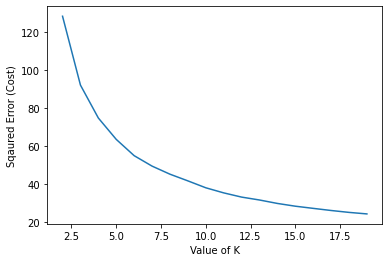

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_lst = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia_lst.append(kmeans.inertia_)
    print(i,': ',silhouette_score(X, kmeans.labels_, metric='euclidean'))
    
plt.plot(range(2,20),inertia_lst)
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()